# Shopping Trends Analysis and Ex

Data source : https://www.kaggle.com/datasets/bhadramohit/customer-shopping-latest-trends-dataset/data?select=shopping_trends.csv

The dataset offers a comprehensive view of consumer shopping trends, aiming to uncover patterns and behaviors in retail purchasing. It contains detailed transactional data across various product categories, customer demographics, and purchase channels. Key features may include:

1. Transaction Details: Purchase date, transaction value, product category, and payment method.
2. Customer Information: Age group, gender, location, and loyalty status.
3. Shopping Behavior: Frequency of purchases, average spend per transaction, and seasonal trends.

The purpose of this analysis is:

1. Analyze consumer purchasing patterns over time.
2. Identify popular product categories and high-performing segments.
3. Develop customer segmentation and personalization strategies.
4. Build predictive models for sales forecasting or customer retention.

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data to be used
data = pd.read_csv("shopping_trends.csv")
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [3]:
# Display summary of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [4]:
# Display shape from data
data.shape

(3900, 19)

In [5]:
# Check for null or NA values
data.isna().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

Berdasarkan hasil diatas, diketahui bahwa data tidak memiliki nilai null

In [6]:
# Check for duplicate values in unique value (customer ID)
data['Customer ID'].duplicated().sum()

0

In [7]:
# View the columns of the data
data.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

### EDA

In [8]:
# Statistical Summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer ID,3900.0,1950.500000,1125.977353,1.0,975.75,1950.5,2925.25,3900.0
Age,3900.0,44.068462,15.207589,18.0,31.00,44.0,57.00,70.0
Purchase Amount (USD),3900.0,59.764359,23.685392,20.0,39.00,60.0,81.00,100.0
Review Rating,3900.0,3.749949,0.716223,2.5,3.10,3.7,4.40,5.0
Previous Purchases,3900.0,25.351538,14.447125,1.0,13.00,25.0,38.00,50.0


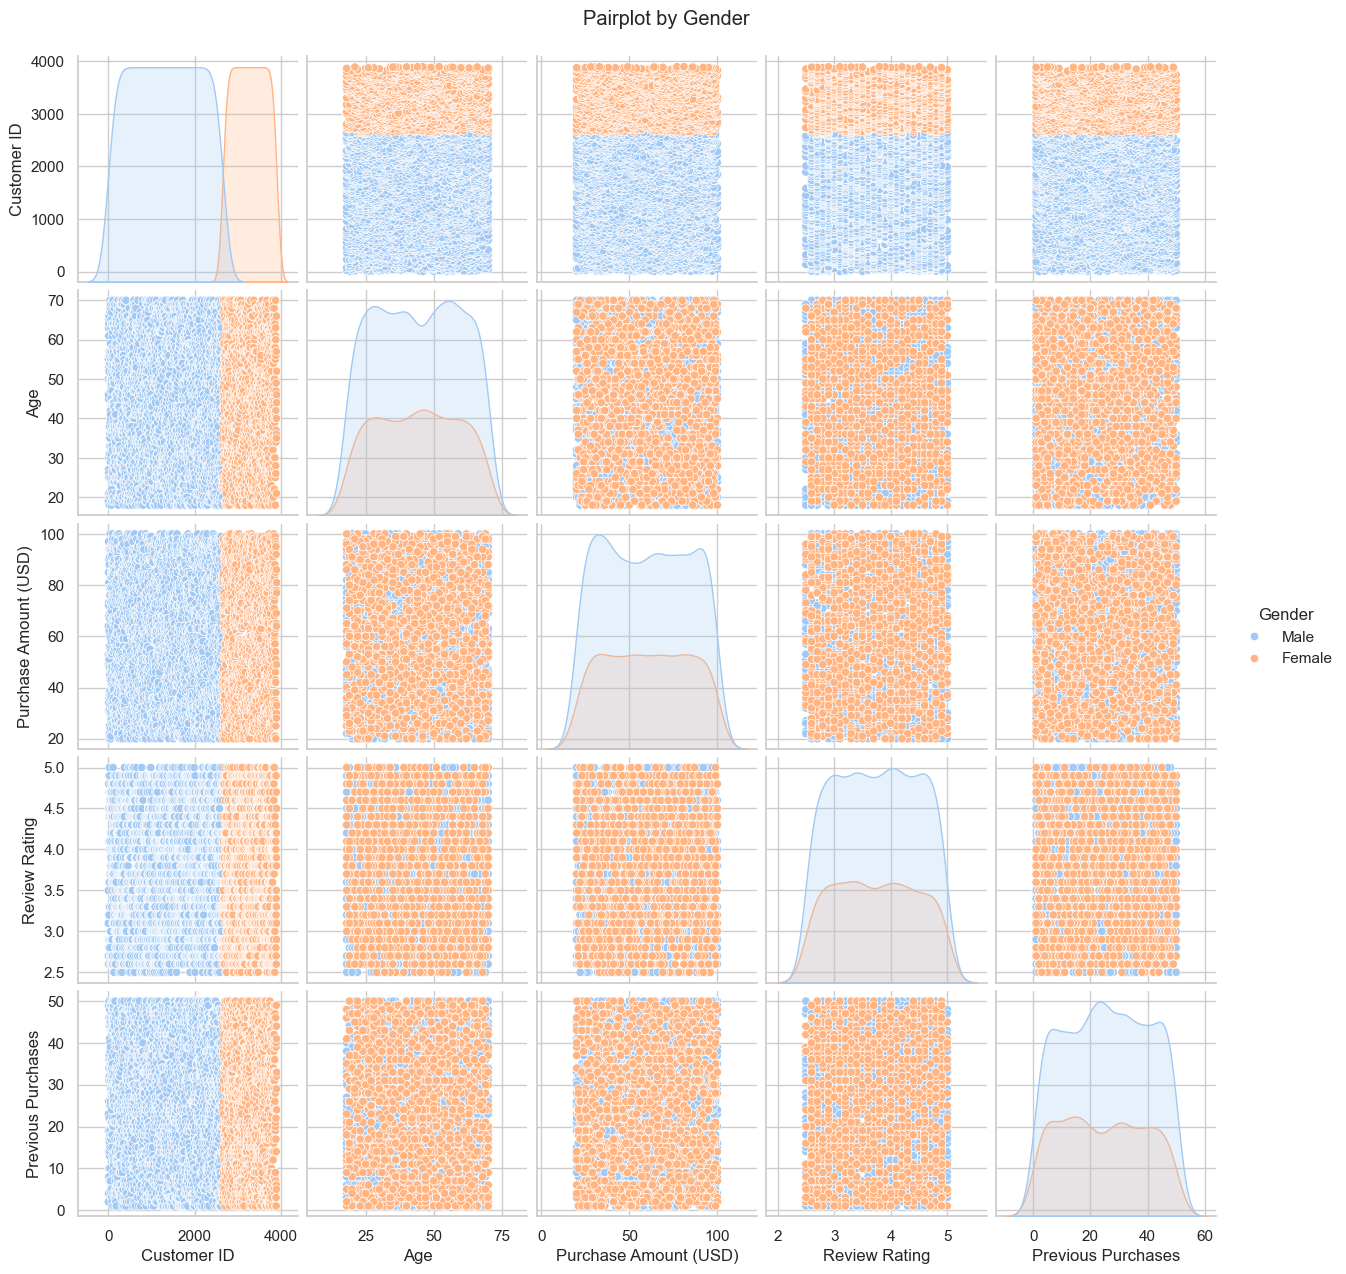

In [9]:
# Create a numeric data plot based on gender
sns.set_theme(style = "whitegrid", palette = "pastel")
sns.pairplot(data, hue = "Gender")
plt.suptitle("Pairplot by Gender", y = 1.02)
plt.show()

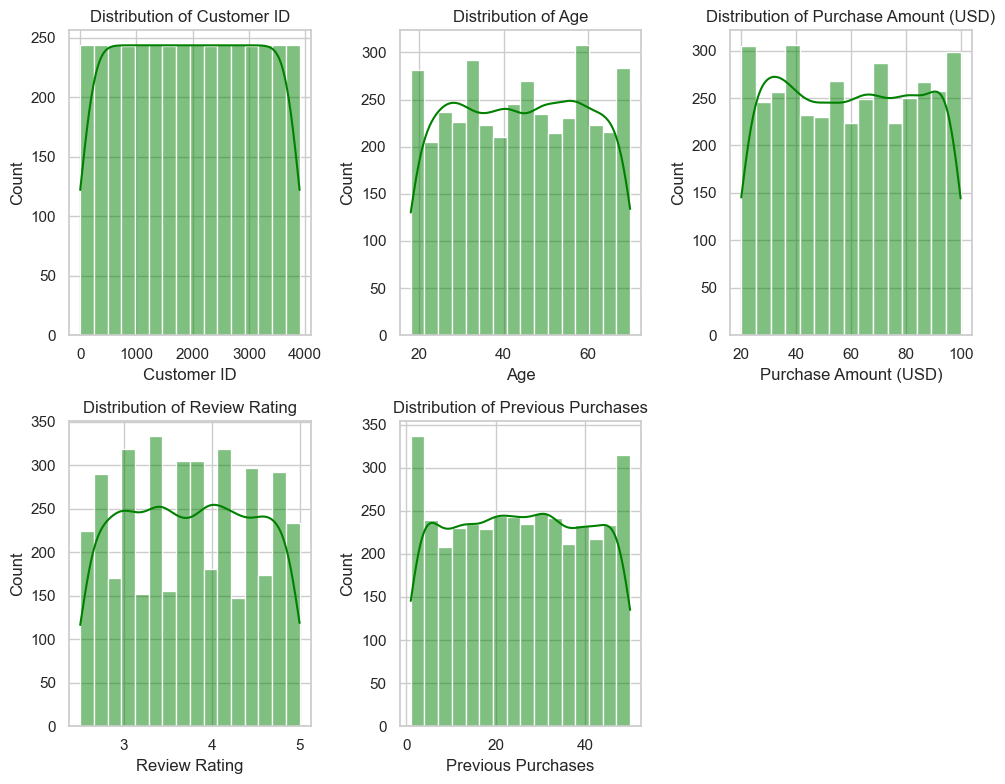

In [10]:
# Barplot of Numerical Features

plt.figure(figsize = (10,8))
sns.set_theme(style = "whitegrid")

# Select numeric columns from the data
numeric_cols = data.select_dtypes(include = 'number').columns

# Create subplots for each numeric column
for i, col in enumerate(numeric_cols) :
    plt.subplot(2, 3, i+1)
    sns.histplot(data[col], kde = True, color = 'green')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

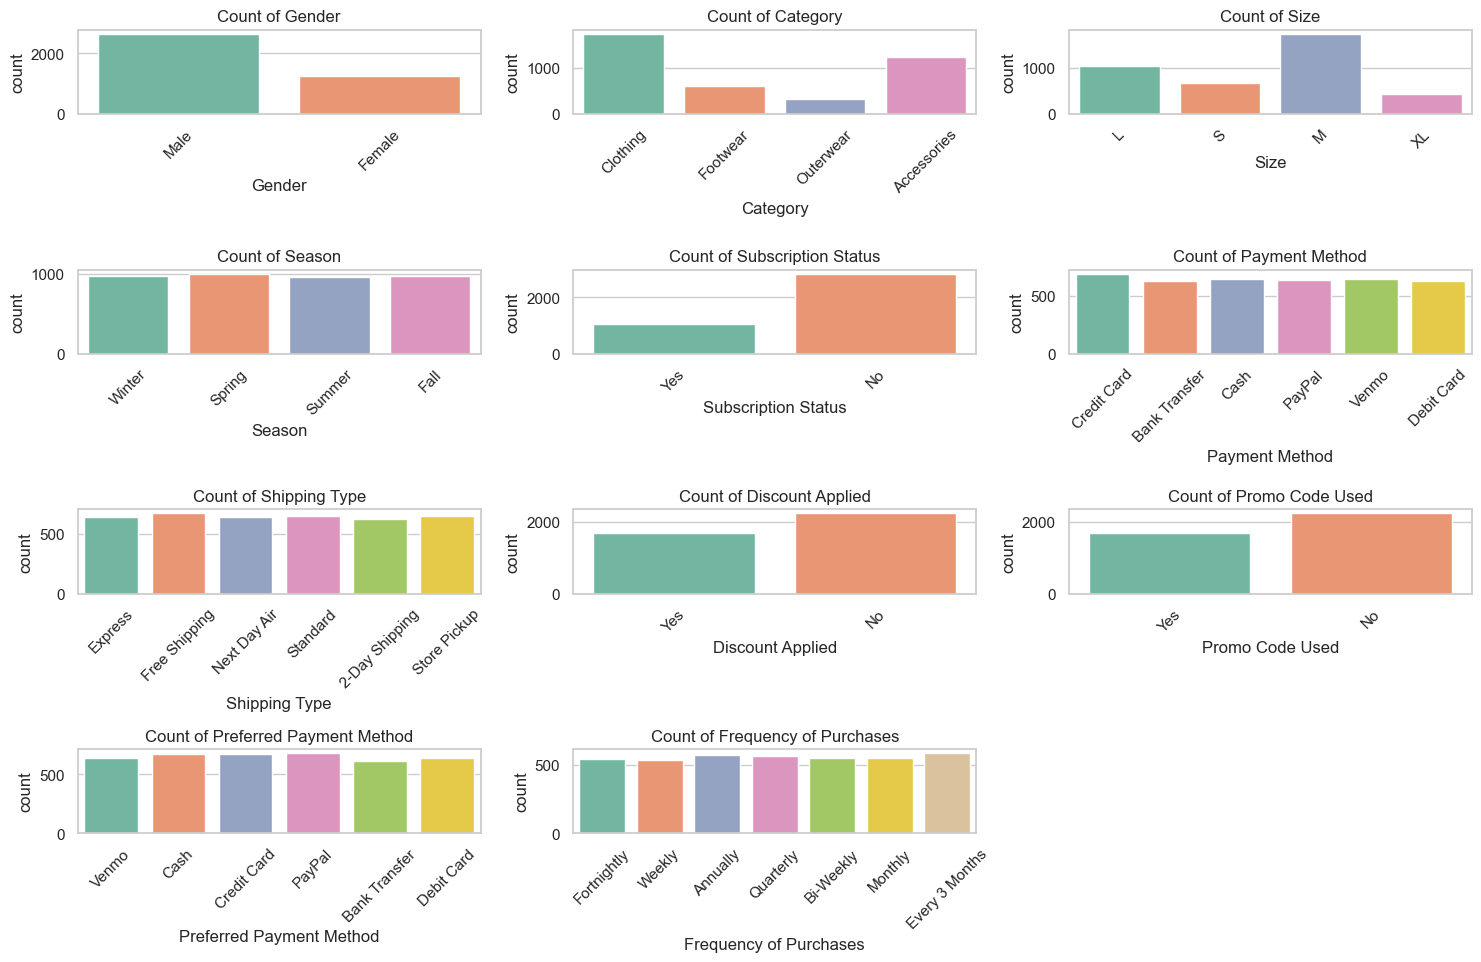

In [11]:
# Ignore the warnings that appear
import warnings
warnings.filterwarnings("ignore")

# Barplot of Categorical Features
plt.figure(figsize = (15,11))
sns.set_theme(style = "whitegrid")

# Define categorical columns
categorical_cols = [
    'Gender', 'Category', 'Size', 'Season', 'Subscription Status', 
    'Payment Method', 'Shipping Type', 'Discount Applied', 
    'Promo Code Used', 'Preferred Payment Method', 'Frequency of Purchases'
]

# Create a countplot for each categorical column
for i, col in enumerate(categorical_cols) :
    plt.subplot(5,3, i+1)
    sns.countplot(data = data, x = col, palette = "Set2")
    plt.xticks(rotation = 45)
    plt.title(f"Count of {col}")
plt.tight_layout()
plt.show()

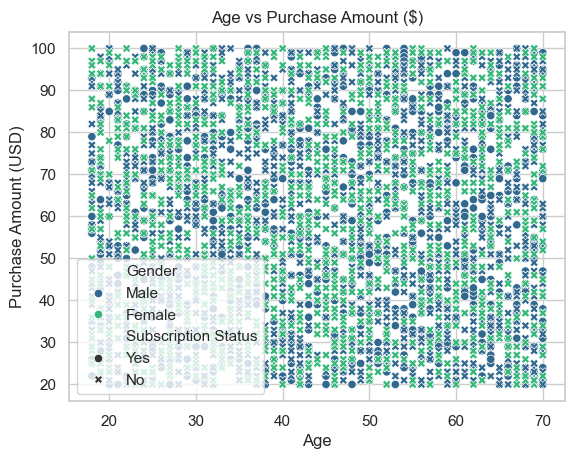

In [12]:
# Age vs Purchase Amount
sns.scatterplot(data = data, x = 'Age', y = 'Purchase Amount (USD)', hue = 'Gender', style = 'Subscription Status', palette = 'viridis')
plt.title('Age vs Purchase Amount ($)')
plt.show()

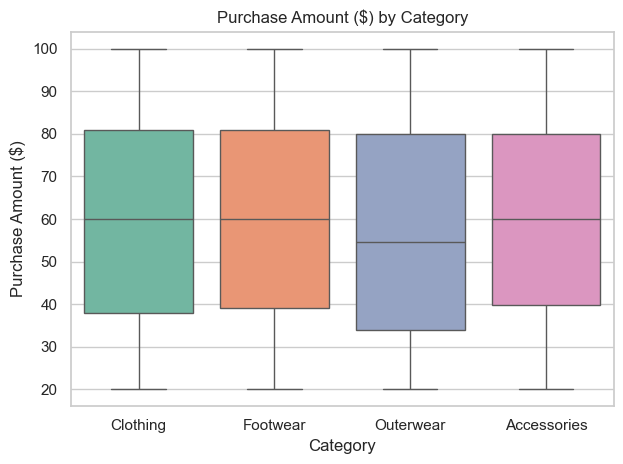

In [13]:
# Puchase Amount by Category
sns.boxplot(data = data, x = 'Category', y = 'Purchase Amount (USD)', palette = 'Set2')
plt.title('Purchase Amount ($) by Category')
plt.xlabel('Category')
plt.ylabel('Purchase Amount ($)')
plt.tight_layout()
plt.show()

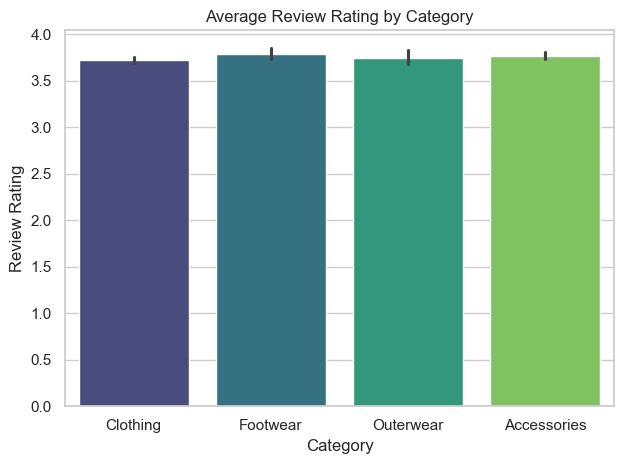

In [14]:
# Average Review Rating by Category
sns.barplot(data = data, x = 'Category', y = 'Review Rating', palette = 'viridis')
plt.title('Average Review Rating by Category')
plt.xlabel('Category')
plt.ylabel('Review Rating')
plt.tight_layout()
plt.show()

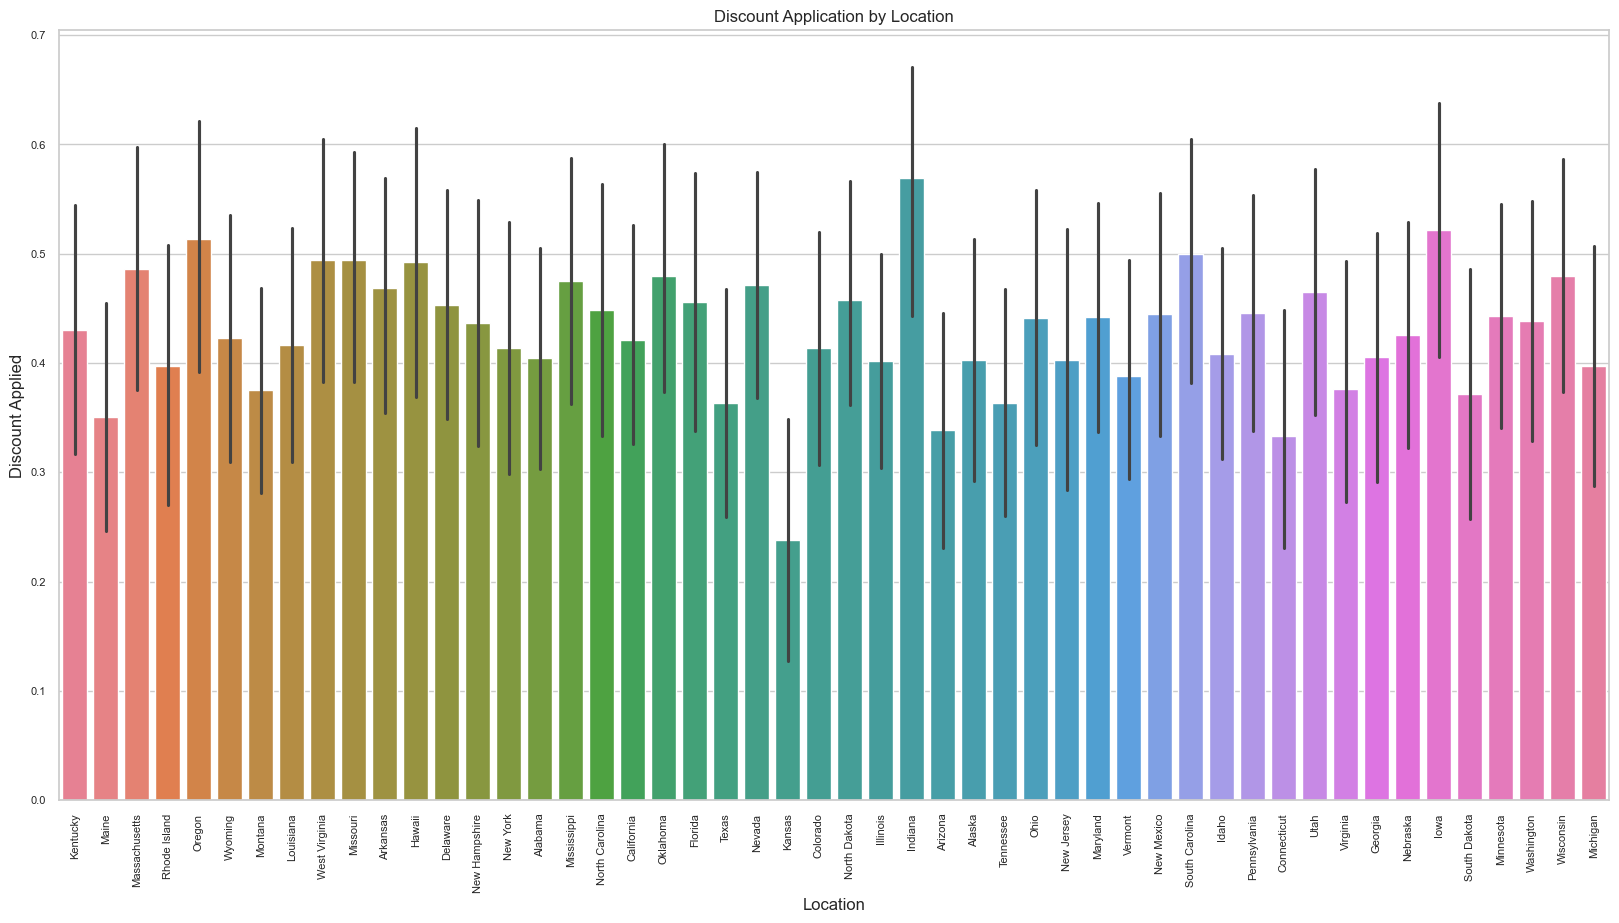

In [15]:
# Discount Application by Location
plt.figure(figsize = (20, 10))
sns.barplot(data = data, x = 'Location', y = data['Discount Applied'].apply(lambda x: 1 if x == 'Yes' else 0), palette = 'husl')
plt.title("Discount Application by Location")
plt.xlabel('Location')
plt.ylabel('Discount Applied')
plt.xticks(rotation = 90)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.show()

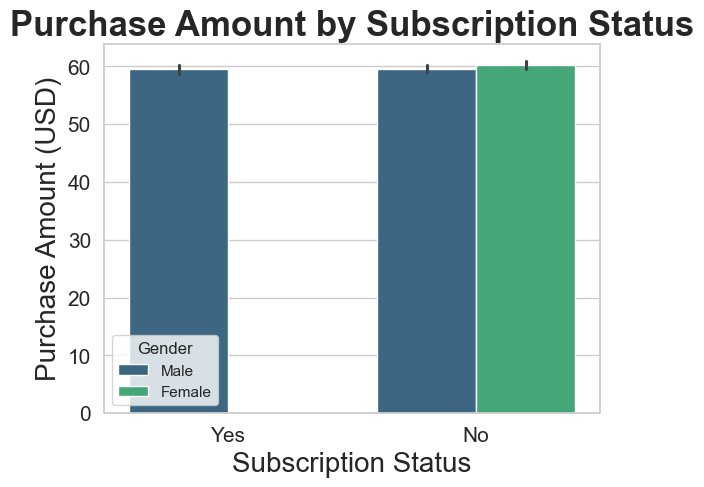

In [16]:
# Purchase Amount by Subsciption Status
sns.barplot(data=data, 
            x='Subscription Status', 
            y='Purchase Amount (USD)', 
            hue='Gender', 
            palette='viridis', 
            errorbar='se')
plt.title('Purchase Amount by Subscription Status', fontweight='bold', fontsize=25)
plt.xlabel('Subscription Status', fontsize=20)
plt.ylabel('Purchase Amount (USD)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

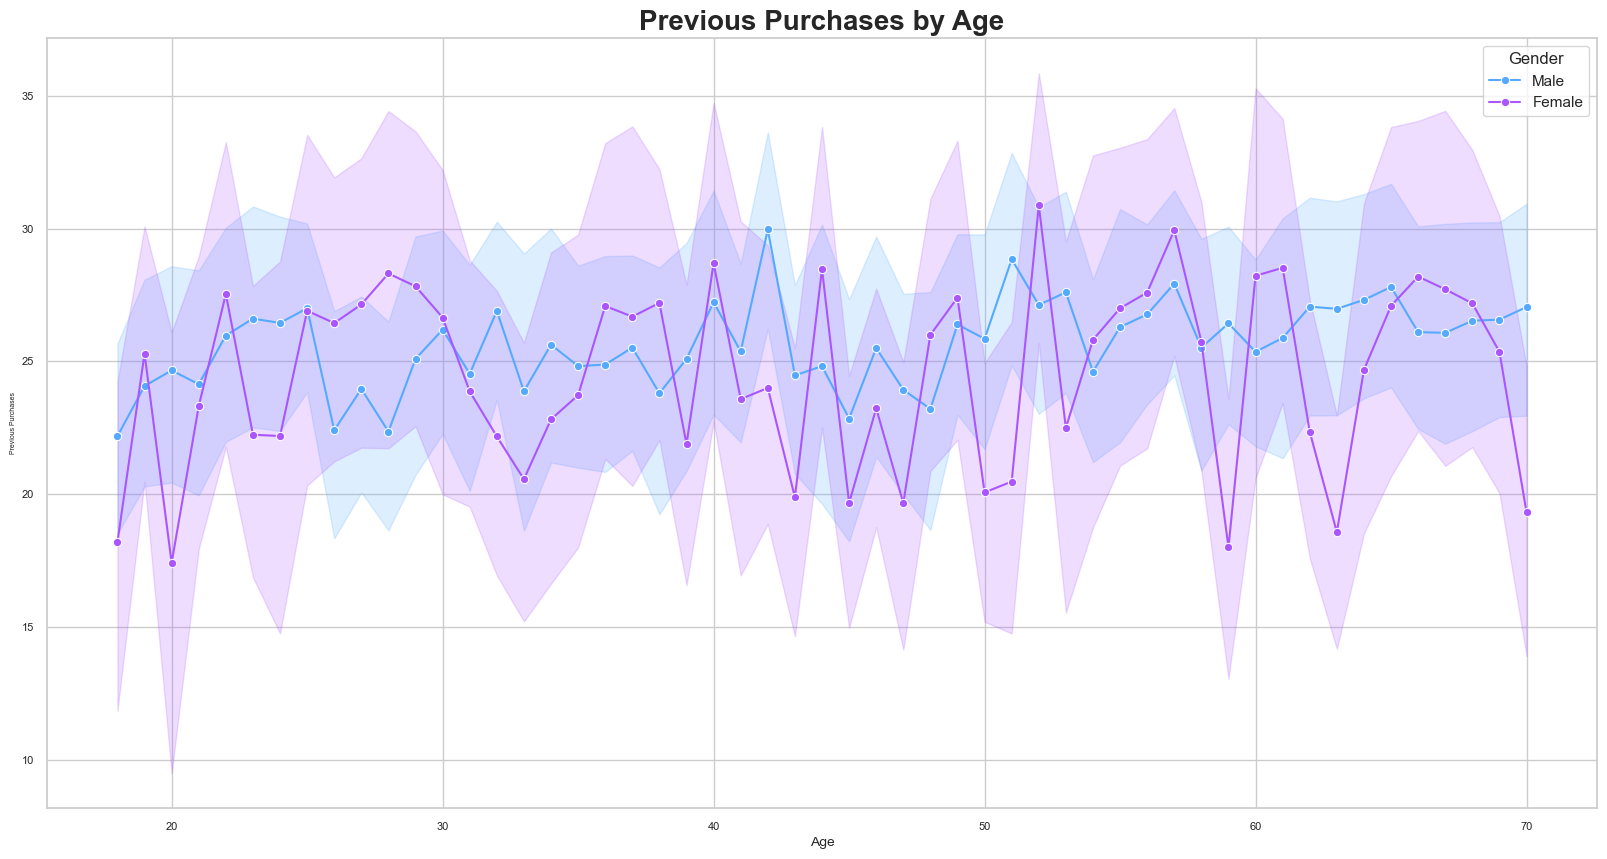

In [17]:
# Previous Purchases by Age
plt.figure(figsize = (20, 10))
sns.lineplot(data = data, 
             x = 'Age', y = 'Previous Purchases',
             hue = 'Gender', marker = 'o',
             palette = 'cool')
plt.title('Previous Purchases by Age',fontweight = 'bold', fontsize = 20)
plt.xlabel('Age', fontsize = 10)
plt.ylabel('Previous Purchases', fontsize = 5)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.show()

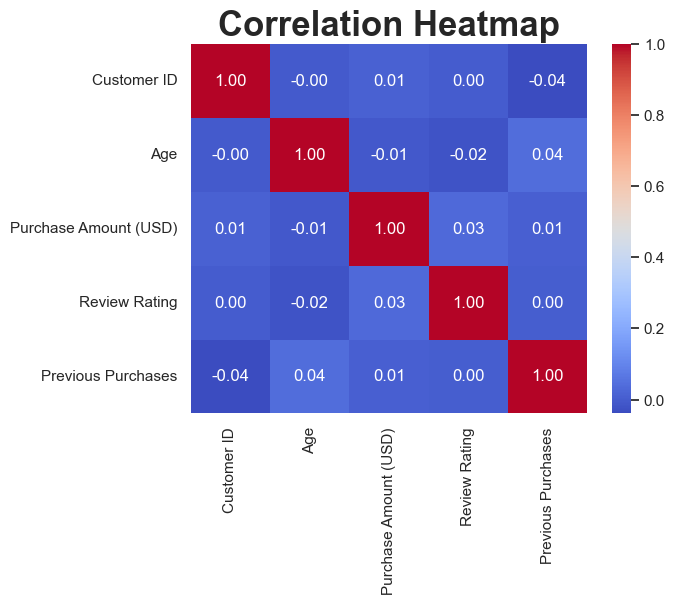

In [18]:
# Correlation Heatmap
correlation_matrix = data.select_dtypes(include = 'number').corr()
sns.heatmap(correlation_matrix, annot = True, 
            cmap = 'coolwarm', fmt = '.2f')
plt.title('Correlation Heatmap',fontweight = 'bold', fontsize = 25)
plt.show()

In [19]:
# Import the libraries needed for modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [20]:
# Load the data to be used
data = pd.read_csv("shopping_trends.csv")
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [21]:
# Display summary of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [22]:
# Set categorical columns
categorical_column = ['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season', 'Subscription Status', 'Payment Method',
                      'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Preferred Payment Method', 'Frequency of Purchases']

In [23]:
# Encoding categorical column
encoder = LabelEncoder()
for col in categorical_column :
    data[col] = encoder.fit_transform(data[col])
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,1,2,1,53,16,0,7,3,3.1,1,2,1,1,1,14,5,3
1,2,19,1,23,1,64,18,0,12,3,3.1,1,0,1,1,1,2,1,3
2,3,50,1,11,1,73,20,2,12,1,3.1,1,1,2,1,1,23,2,6
3,4,21,1,14,2,90,38,1,12,1,3.5,1,4,3,1,1,49,4,6
4,5,45,1,2,1,49,36,1,21,1,2.7,1,1,2,1,1,31,4,0


In [24]:
# Drop ID dan Target
X = data.drop(columns = ['Customer ID', 'Subscription Status'])
y = data['Subscription Status']

In [25]:
# Scaling numerical column
numerical_column = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
scaler = StandardScaler()
X[numerical_column] = scaler.fit_transform(X[numerical_column])
X.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,0.718913,1,2,1,-0.285629,16,0,7,3,-0.907584,2,1,1,1,-0.785831,5,3
1,-1.648629,1,23,1,0.178852,18,0,12,3,-0.907584,0,1,1,1,-1.616552,1,3
2,0.390088,1,11,1,0.558882,20,2,12,1,-0.907584,1,2,1,1,-0.162789,2,6
3,-1.517099,1,14,2,1.276716,38,1,12,1,-0.349027,4,3,1,1,1.637107,4,6
4,0.061263,1,2,1,-0.454531,36,1,21,1,-1.466141,1,2,1,1,0.391025,4,0


In [26]:
# Apply Label Encoding to remaining object-type columns
for col in X.select_dtypes(include='object').columns:
    X[col] = encoder.fit_transform(X[col])

In [27]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model yang digunakan : Random Forest
Accuracy: 0.8410
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.83      0.88       569
           1       0.65      0.87      0.75       211

    accuracy                           0.84       780
   macro avg       0.80      0.85      0.82       780
weighted avg       0.87      0.84      0.85       780



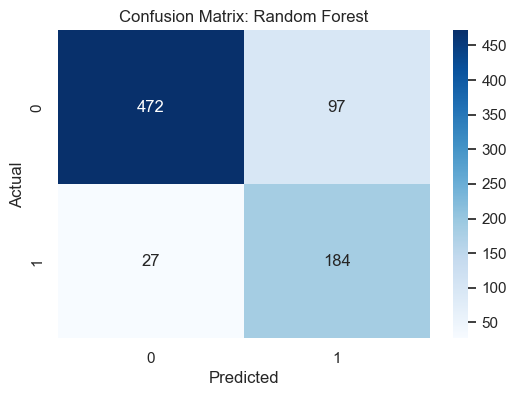

model yang digunakan : Logistic Regression
Accuracy: 0.8641
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.81      0.90       569
           1       0.67      1.00      0.80       211

    accuracy                           0.86       780
   macro avg       0.83      0.91      0.85       780
weighted avg       0.91      0.86      0.87       780



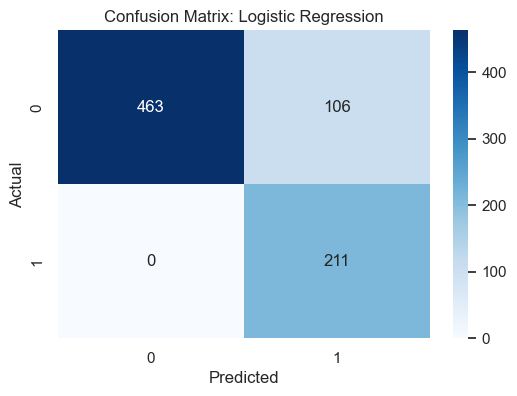

model yang digunakan : SVM (Support Vector Machine)
Accuracy: 0.7295
Classification Report:
              precision    recall  f1-score   support

           0       0.73      1.00      0.84       569
           1       0.00      0.00      0.00       211

    accuracy                           0.73       780
   macro avg       0.36      0.50      0.42       780
weighted avg       0.53      0.73      0.62       780



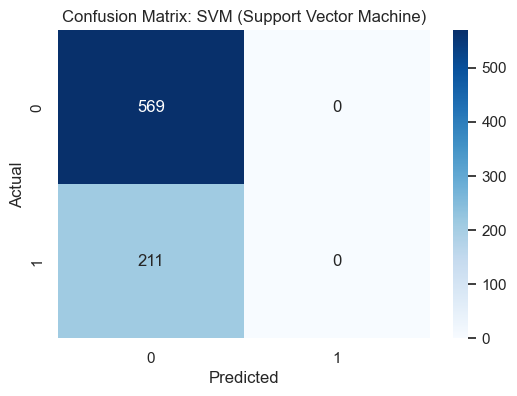

model yang digunakan : K-Nearest Neighbors (KNN)
Accuracy: 0.6923
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.89      0.81       569
           1       0.35      0.16      0.22       211

    accuracy                           0.69       780
   macro avg       0.55      0.53      0.51       780
weighted avg       0.64      0.69      0.65       780



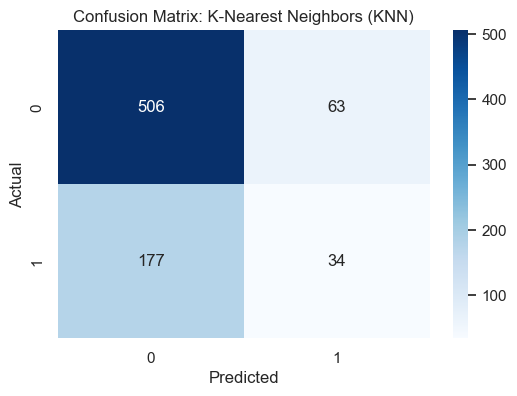

Comparison of Model Accuracies
                          Model  Accuracy
1           Logistic Regression  0.864103
0                 Random Forest  0.841026
2  SVM (Support Vector Machine)  0.729487
3     K-Nearest Neighbors (KNN)  0.692308


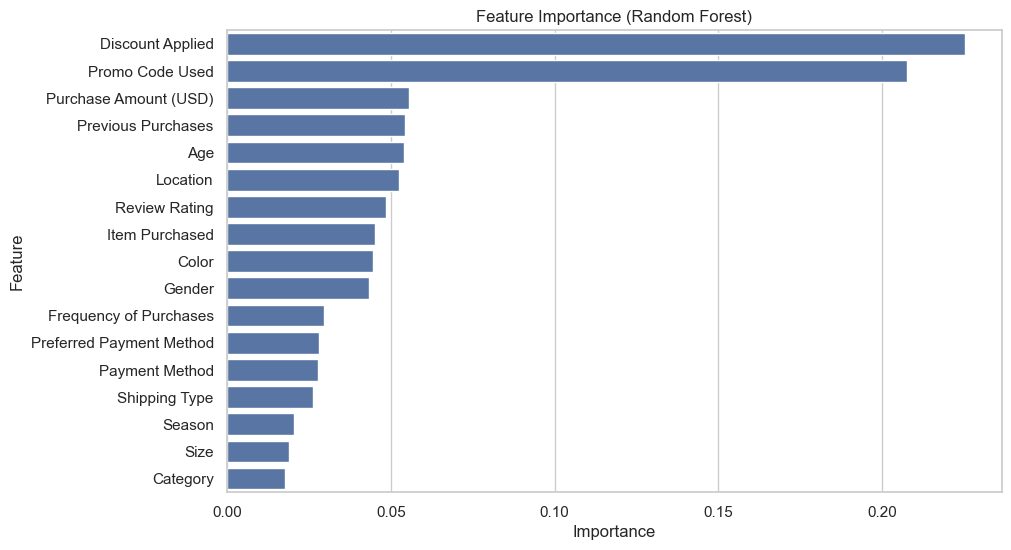

In [28]:
# Create a supervised learning model
models = {
    "Random Forest" : RandomForestClassifier(random_state = 42),
    "Logistic Regression" : LogisticRegression(random_state = 42),
    "SVM (Support Vector Machine)" : SVC(random_state = 42, probability = True),
    "K-Nearest Neighbors (KNN)" : KNeighborsClassifier()
}
results = {}
for name, model in models.items() :
    print(f"model yang digunakan : {name}")
    # Train the model
    model.fit(X_train, y_train)
    # Predict using test set
    y_pred = model.predict(X_test)
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    # Save the accuracy score
    results[name] = accuracy

# === Compare Accuracy of All Models ===
results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"]).sort_values(by="Accuracy", ascending=False)
print("Comparison of Model Accuracies")
print(results_df)

# === Feature Importance for Random Forest ===
# Feature importance is only available for tree-based models like Random Forest
rf_model = models["Random Forest"]
importances = rf_model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.title("Feature Importance (Random Forest)")
plt.show()

Berdasarkan akurasi yang didapat, diketahui bahwa logistic regression memiliki akurasi tertinggi yaitu 0.86